# Лабораторна робота 3

## Виконано студенкою групи АнД-41
## Бовсуновською Марією

## Завдання
1. На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.
2. Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи у наведеній нижче таблиці.
3. Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).
4. Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.
5. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
6. Результати викласти у репозиторії GitHub (папка Lab3).
7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

Варіант значень індексів класів для виконання лабораторної роботи №3:

Варіант 3 : (2,5,9)

All labels:
0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot

Мій варіант індексів:
2 Pullover
5 Sandal
9 Ankle boot


# Запитати навіщо потрібний Flatten-шар, що він дає, що це за зглажування і на що  воно впливає

In [279]:
import numpy as np
import random as rd
import tensorflow as tf

np.random.seed(0)
rd.seed(0)
tf.random.set_seed(0)
seed=0

import pandas as pd
from keras.utils import np_utils
from pandas_ml import ConfusionMatrix


import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline



In [280]:
print("downloading Fashion MNIST dataset")
tr_data=pd.read_csv("fashion-mnist_train.csv", sep = ",")
print("train data downloaded")
ts_data=pd.read_csv("fashion-mnist_test.csv", sep = ",")
print("test data downloaded")


downloading Fashion MNIST dataset
train data downloaded
test data downloaded


In [281]:
variant=[2,5,9]

tr_df=tr_data.loc[tr_data['label'].isin(variant)]
ts_df=ts_data.loc[ts_data['label'].isin(variant)]


In [282]:
print(tr_df.head())
print(ts_df.head())
print(tr_df.shape)
print(ts_df.shape)



    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       2       0       0       0       0       0       0       0       0   
1       9       0       0       0       0       0       0       0       0   
7       5       0       0       0       0       0       0       0       0   
12      9       0       0       0       0       0       0       0       0   
14      2       0       0       0       0       1       1       0       0   

    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
7        0  ...         0         0         0         0         0         0   
12       0  ...         0         0         0         0         0         0   
14       0  ...         0         0       118       190       162        82   

    pixel781  pixel782  pixel783  pixel784  
0          0     

In [291]:
print(tr_df.label.value_counts())
print(ts_df.label.value_counts())

tr_x=tr_df.drop(columns='label')/255.
ts_x=ts_df.drop(columns='label')/255.
tr_y=tr_df['label']
ts_y=ts_df['label']

translated_labels=[0,1,2]
for i in np.arange(len(variant)):
    tr_y=tr_y.replace(variant[i], translated_labels[i])
    ts_y=ts_y.replace(variant[i], translated_labels[i])

uniques, ids = np.unique(ts_y, return_inverse=True)


tr_y=np_utils.to_categorical(y=tr_y, num_classes=len(variant))
ts_y=np_utils.to_categorical(y=ts_y, num_classes=len(variant))


print(tr_x.shape)
print(ts_x.shape)
print(tr_y.shape)
print(ts_y.shape)







9    6000
5    6000
2    6000
Name: label, dtype: int64
9    1000
5    1000
2    1000
Name: label, dtype: int64
(18000, 784)
(3000, 784)
(18000, 3)
(3000, 3)


In [293]:
epochs=100

model_1=tf.keras.Sequential([ 
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model_1.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
)

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))


In [294]:
history_1=model_1.fit(tr_x,tr_y,
                epochs=epochs, 
                verbose=0, 
                callbacks=[lr_scheduler]
                )

model_1.evaluate(tr_x,tr_y)

563/563 [==============================] - 7s 11ms/step - loss: 2.9637 - accuracy: 0.3334


[2.9637043476104736, 0.33338889479637146]

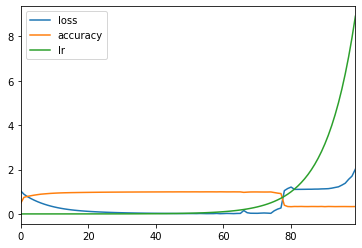

In [295]:
pd.DataFrame(history_1.history).plot()

best learning rate:  0.08912509381337459
lowest loss:  0.010172894224524498


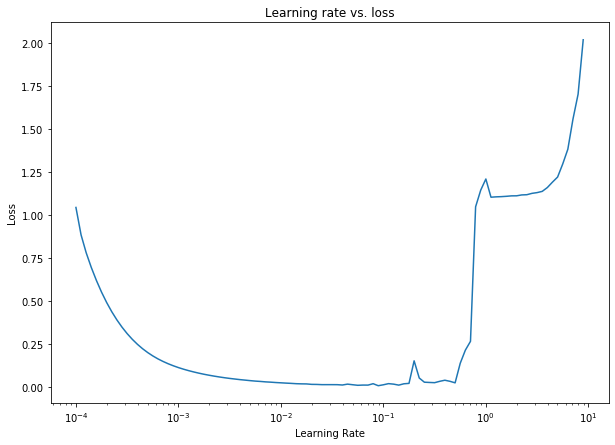

In [296]:
lrs = 1e-4 * (10 ** (np.arange(epochs)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_1.history["loss"]) # we want the x-axis (learning rate) to be log scale, щоб прибрати степінь, яку задавали раніше
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")
blr=lrs[history_1.history["loss"].index(min(history_1.history["loss"]))]
print("best learning rate: ", blr)
print("lowest loss: ",history_1.history["loss"][history_1.history["loss"].index(min(history_1.history["loss"]))] )

In [297]:
model_2=tf.keras.Sequential([ 
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model_2.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.SGD(learning_rate=blr), 
    metrics=['accuracy']
)
history_2=model_2.fit(tr_x,tr_y,
                epochs=epochs, 
                verbose=0, 
                )

model_2.evaluate(tr_x,tr_y)

563/563 [==============================] - 2s 3ms/step - loss: 3.1018e-05 - accuracy: 1.0000


[3.1018254958326e-05, 1.0]

In [298]:
pr_y=model_2.predict(ts_x)
print(pr_y.shape)

pr_y=np.argmax(pr_y,axis=1 )
print(pr_y)

ts_y=np.argmax(ts_y,axis=1 )
print(ts_y)





(3000, 3)
[0 0 0 ... 1 2 2]
[0 0 0 ... 1 2 2]


In [299]:

data_for_conf = {'y_Actual':    ts_y,
            'y_Predicted': pr_y
            }
df_for_conf = pd.DataFrame(data_for_conf, columns=['y_Actual','y_Predicted'])

Confusion_Matrix = ConfusionMatrix(df_for_conf['y_Actual'], df_for_conf['y_Predicted'])
Confusion_Matrix.print_stats()


C:\Users\1\AppData\Roaming\Python\Python37\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
C:\Users\1\AppData\Roaming\Python\Python37\site-packages\pandas_ml\confusion_matrix\bcm.py:344: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.LRP) / self.LRN)


Confusion Matrix:

Predicted     0    1     2  __all__
Actual                             
0          1000    0     0     1000
1             2  977    21     1000
2             0    8   992     1000
__all__    1002  985  1013     3000


Overall Statistics:

Accuracy: 0.9896666666666667
95% CI: (0.9853644745738875, 0.9929685048714887)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.0
Kappa: 0.9845
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         0           1           2
Population                                   3000        3000        3000
P: Condition positive                        1000        1000        1000
N: Condition negative                        2000        2000        2000
Test outcome positive                        1002         985        1013
Test outcome negative                        1998        2015        1987
TP: True Positive                            1000         977         992
TN: True Negative              